In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

from sklearn.metrics import accuracy_score
from sklearn import metrics 


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Data Loading


#training data
data_train = pd.read_excel("housing.xlsx", sheet_name='Hoja1')
data_train.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


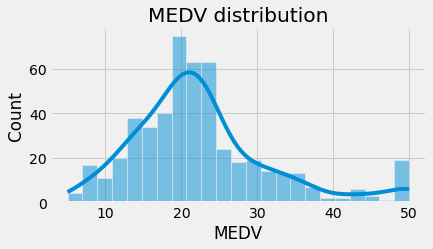

In [4]:
# Distribution of the output variable
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data_train, x='MEDV', kde=True,ax=ax)
ax.set_title("MEDV distribution")
ax.set_xlabel('MEDV');

In [5]:
# Normalization and new df
scaler = MinMaxScaler()
scaler.fit(data_train)
data= scaler.transform(data_train)

In [6]:
df=pd.DataFrame(data, columns=data_train.columns)

In [7]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "MEDV"),
                                        df['MEDV'],
                                        random_state = 123,
                                        shuffle      = True
                                    )


In [8]:
# Checking training and test datasets

print("Training dataset")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
#display(X_train.describe(include = 'object'))
print(" ")

print("Test dataset")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
#display(X_test.describe(include = 'object'))

Training dataset
-----------------------


count    379.000000
mean       0.387822
std        0.206627
min        0.000000
25%        0.264444
50%        0.360000
75%        0.444444
max        1.000000
Name: MEDV, dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.915314e-02,0.107573,0.402454,0.060686,0.349300,0.521670,0.676502,0.240661,0.367902,0.418478,0.622916,0.901194,0.304640
std,1.018085e-01,0.224127,0.248032,0.239069,0.238031,0.136752,0.290427,0.191597,0.373882,0.321121,0.227675,0.230832,0.198180
min,7.518865e-10,0.000000,0.000000,0.000000,0.014403,0.000000,0.031926,0.003592,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.542172e-09,0.000000,0.187081,0.000000,0.139918,0.446254,0.422245,0.088275,0.130435,0.175573,0.510638,0.949102,0.149007
50%,2.778721e-08,0.000000,0.349304,0.000000,0.314815,0.504694,0.766220,0.179405,0.173913,0.272901,0.680851,0.988098,0.268212
75%,4.080748e-02,0.125000,0.652482,0.000000,0.491770,0.585840,0.935118,0.362566,1.000000,0.914122,0.808511,0.998285,0.424531
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.989462,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972682


 
Test dataset
-----------------------


count    127.000000
mean       0.394978
std        0.198225
min        0.048889
25%        0.270000
50%        0.360000
75%        0.474444
max        1.000000
Name: MEDV, dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,1.270000e+02,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.927980e-02,0.131732,0.398153,0.094488,0.348770,0.522464,0.675949,0.247515,0.383088,0.433341,0.622969,0.890731,0.291767
std,8.241425e-02,0.258588,0.246645,0.293665,0.240569,0.128599,0.289448,0.191803,0.393550,0.324185,0.238937,0.229054,0.194089
min,0.000000e+00,0.000000,0.043964,0.000000,0.000000,0.110558,0.000000,0.000000,0.000000,0.001908,0.000000,0.005749,0.005243
25%,7.640807e-09,0.000000,0.176446,0.000000,0.129630,0.442901,0.447992,0.087870,0.130435,0.182252,0.489362,0.916196,0.134520
50%,2.956521e-08,0.000000,0.308568,0.000000,0.314815,0.511401,0.780639,0.198956,0.173913,0.314885,0.691489,0.978491,0.261865
75%,4.131380e-02,0.190000,0.652482,0.000000,0.491770,0.587565,0.945932,0.383235,1.000000,0.914122,0.808511,0.998058,0.401076
max,5.747132e-01,0.950000,0.924656,1.000000,1.000000,1.000000,1.000000,0.871218,1.000000,0.914122,0.914894,1.000000,1.000000


In [9]:
# Taking care of variables acoording to their tye
# ==============================================================================
# The numerical columns are standardized (normaliozed) 
# The categorical columns are treated using one-hot-encoding
# To keep the columns that we do not want to apply any transformation
# we have to apply remainder='passthrough'.

# Identificaction of numerivcal and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformations for the numerical variables
numeric_transformer = Pipeline(
                        #steps=[('scaler', StandardScaler())]
                        steps=[('scaler', MinMaxScaler())]
                      )

# Transformations for the categorical variables
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [10]:
numeric_cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD ',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [11]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                  'AGE', 'DIS', 'RAD ', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [12]:
set_config(display='text')

In [13]:
# Application of transformations
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [14]:
X_train_prep

array([[2.98956351e-09, 0.00000000e+00, 1.87080968e-01, ...,
        8.08510638e-01, 1.00000000e+00, 1.78156028e-01],
       [3.73251485e-02, 0.00000000e+00, 7.05835064e-01, ...,
        2.23404255e-01, 1.00000000e+00, 7.11773050e-01],
       [1.35701443e-02, 0.00000000e+00, 7.05835064e-01, ...,
        2.23404255e-01, 7.36219678e-01, 3.60283688e-01],
       ...,
       [3.80022973e-08, 0.00000000e+00, 2.66029646e-01, ...,
        7.44680851e-01, 1.00000000e+00, 1.69361702e-01],
       [1.03252554e-01, 0.00000000e+00, 6.52481620e-01, ...,
        8.08510638e-01, 1.00000000e+00, 6.20425532e-01],
       [5.12032417e-02, 0.00000000e+00, 6.52481620e-01, ...,
        8.08510638e-01, 8.93590196e-01, 1.52907801e-01]])

In [15]:
# Conversion into dataframe adding the names of the columns
# ==============================================================================
#encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
#              .get_feature_names(cat_cols)
#labels = np.concatenate([numeric_cols, encoded_cat])
labels = np.concatenate([numeric_cols])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  B        379 non-null    float64
 12  LSTAT    379 non-null    float64
dtypes: float64(13)
memory usage: 38.6 KB


In [16]:
# The previous process is OK but and alternative is to do this process preprocessing and modelling together

In [18]:
# Pipeline of preproccssing and modelling
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        #steps=[('scaler', StandardScaler())]
                        steps=[('scaler', MinMaxScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('model', MLPRegressor(solver = 'adam', max_iter= 1000))]) # Altenative solver lbfgs or sgd

In [19]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'model__hidden_layer_sizes': [(10), (20), (10, 10)],
    'model__alpha': np.logspace(-3, 3, 10),
    'model__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_model__learning_rate_init,param_model__hidden_layer_sizes,param_model__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
2,0.01,20,0.021544,-0.008898,0.003357,-0.008304,0.001839
11,0.01,20,0.464159,-0.010105,0.003294,-0.009402,0.001396
14,0.01,"(10, 10)",0.004642,-0.010387,0.003449,-0.008080,0.002495
28,0.01,"(10, 10)",0.464159,-0.010427,0.003233,-0.009505,0.001089
13,0.01,"(10, 10)",0.1,-0.011016,0.003162,-0.009785,0.002800
44,0.01,10,0.464159,-0.011692,0.003147,-0.010602,0.000864
37,0.01,20,0.001,-0.011704,0.005434,-0.009040,0.002954
24,0.01,20,0.1,-0.012259,0.005532,-0.010807,0.003735
32,0.01,10,0.004642,-0.012530,0.004533,-0.012052,0.002236
25,0.01,10,0.001,-0.012542,0.005575,-0.010424,0.003006


In [20]:
# best model selected

model_final = grid.best_estimator_

In [21]:
# showing the characteristics of the best model found
model_final['model'].get_params()

{'activation': 'relu',
 'alpha': 0.021544346900318832,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 20,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = model_final.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


R2 Value in training: 0.83
Accuracy in training -inf


In [23]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model_final.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test 78.83


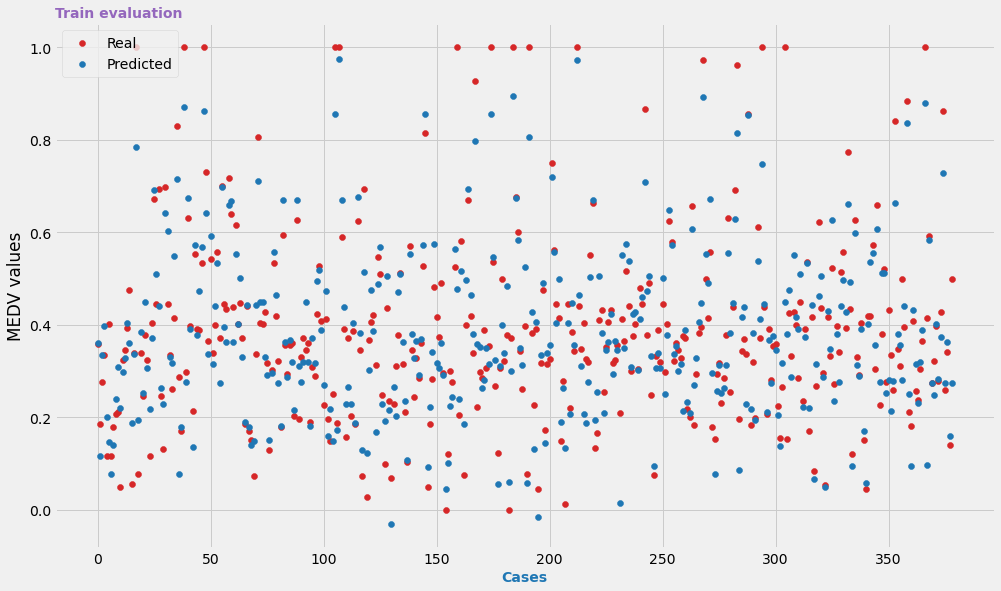

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

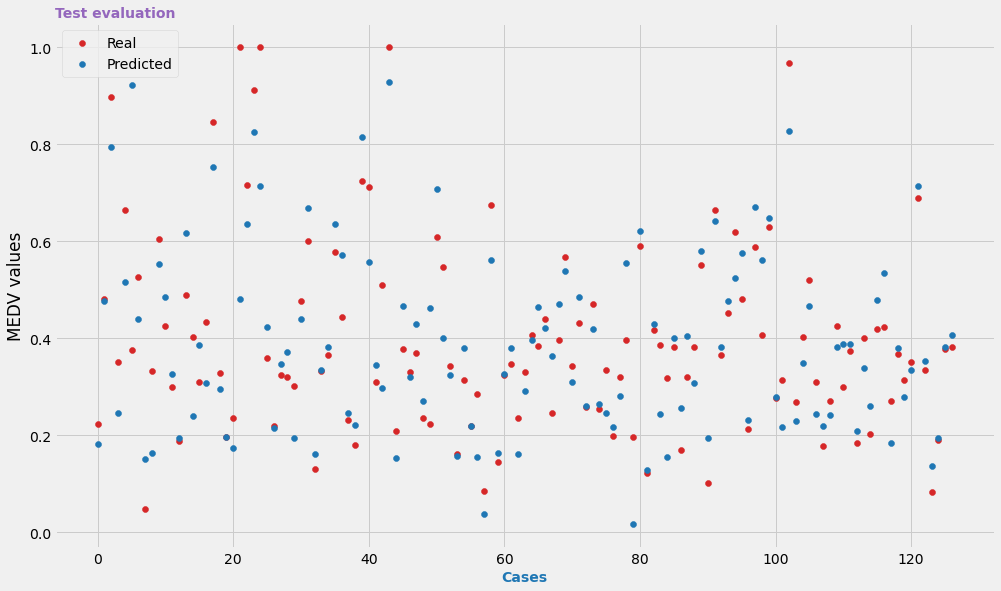

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

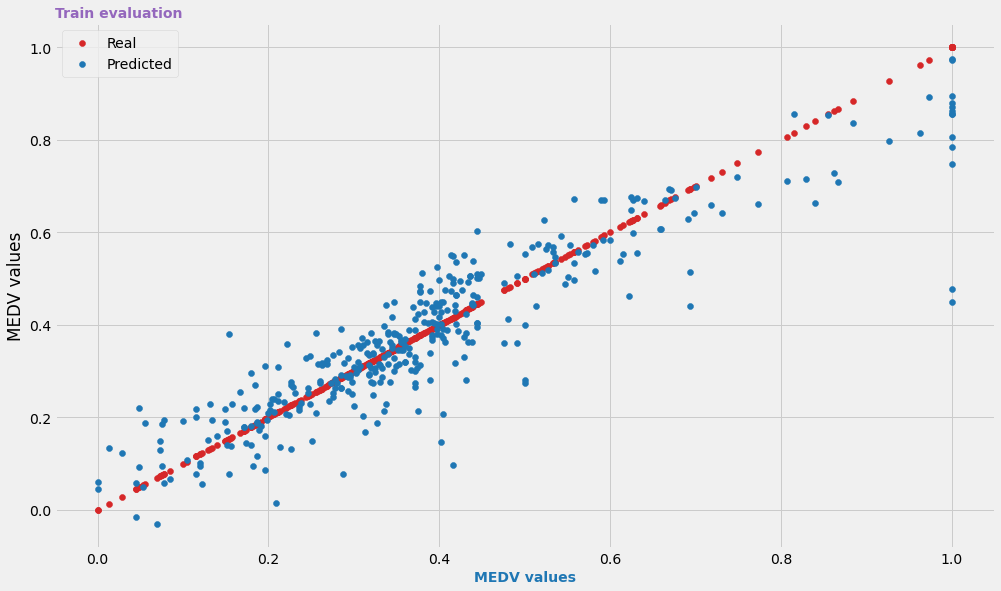

In [26]:
import matplotlib.pyplot as plt  # TRAINING

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

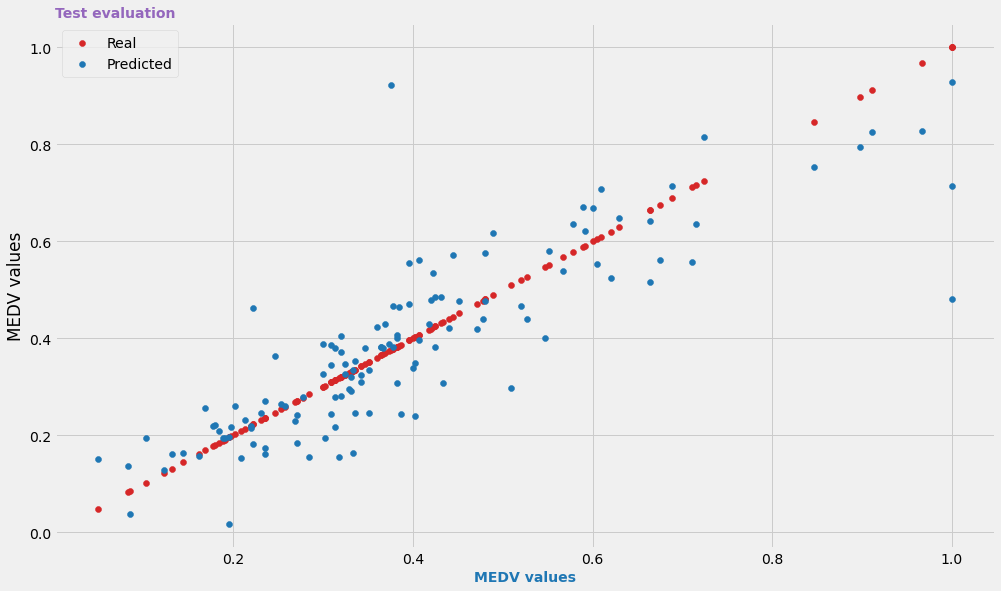

In [27]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

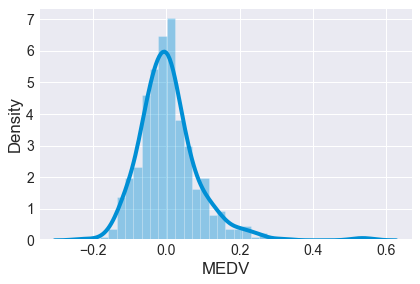

In [28]:
# Error in training
sns.set_style('darkgrid')
sns.distplot(y_train-prediction_train)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

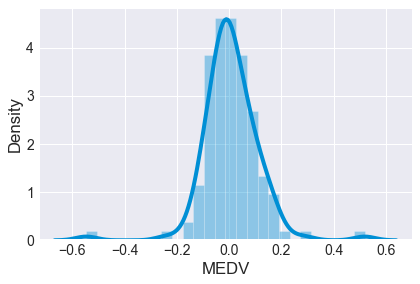

In [29]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test-prediction_test)